### Loading dependencies

In [1]:
import csv
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Convolution2D, MaxPooling2D, Dropout, Activation, Cropping2D, SpatialDropout2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
#from keras.regularizers import l2

Using TensorFlow backend.


### Loading Data

In [2]:
#%% Loading data

# Loading the data names
lines = []
with open("/home/carnd/data/driving_log.csv") as csvfile:
    reader = csv.reader( csvfile )
    for line in reader:
        lines.append( line )

# Loading the data 
imagesC = []                                                # Center camera images
imagesL = []                                                # Left camera images
imagesR = []                                                # Right camera images
measurmentsC = []                                           # Steering wheel measurements for center camera
measurmentsL = []                                           # Steering wheel measurements for left camera
measurmentsR = []                                           # Steering wheel measurements for right camera
for line in lines:
    # Center camera images
    source_path = line[0]
    filename = source_path.split('/')[-1]
    current_path = '/home/carnd/data/IMG/' + filename
    image = cv2.imread( current_path )
    imagef = cv2.flip(image, 1)
    imagesC.append(image)
    imagesC.append(imagef)
    # Left camera images
    source_path = line[1]
    filename = source_path.split('/')[-1]
    current_path = '/home/carnd/data/IMG/' + filename
    image = cv2.imread( current_path )
    imagef = cv2.flip(image, 1)
    imagesL.append(image)
    imagesL.append(imagef)
    # Right camera images
    source_path = line[2]
    filename = source_path.split('/')[-1]
    current_path = '/home/carnd/data/IMG/' + filename
    image = cv2.imread( current_path )
    imagef = cv2.flip(image, 1)
    imagesR.append(image)
    imagesR.append(imagef)
    # Center steering wheel measurements
    measurment = float(line[3])
    measurmentsC.append( measurment )
    measurmentsC.append( -measurment)
    # Left steering wheel measurements
    measurmentl = measurment+.2
    measurmentsL.append( measurmentl)
    measurmentsL.append(-measurmentl)
    # Right steering wheel measurements
    measurmentr = measurment-.2
    measurmentsR.append( measurmentr)
    measurmentsR.append(-measurmentr)
    
del line

In [ ]:
# Adding all images 
X_train = []
X_train.extend(imagesC)
X_train.extend(imagesL)
X_train.extend(imagesR)
X_train = np.array(X_train)
del imagesC, imagesL, imagesR

# Adding some very small white noise to the zero measurements to decrease the bias of the data
measurmentsC = np.array(measurmentsC)
measurmentsC[measurmentsC==0] = measurmentsC[measurmentsC==0]+(.01*np.random.randn(measurmentsC[measurmentsC==0].shape[0]))

measurmentsR = np.array(measurmentsR)
measurmentsR[measurmentsR==-.2] = measurmentsR[measurmentsR==-.2]+(.01*np.random.randn(measurmentsR[measurmentsR==-.2].shape[0]))

measurmentsL = np.array(measurmentsL)
measurmentsL[measurmentsL==.2] = measurmentsL[measurmentsL==.2]+(.01*np.random.randn(measurmentsL[measurmentsL==.2].shape[0]))
# Adding the steering wheel measurements data
measurments = []
measurments.extend(measurmentsC)
measurments.extend(measurmentsL)
measurments.extend(measurmentsR)
del measurmentsC, measurmentsL, measurmentsR
y_train = np.array(measurments)
'''
smpl_im = np.random.randint( 0, len( imagesC ) )
plt.figure("images", figsize = (13,8))
plt.subplot(3,3,1)
plt.title("Raw Left Camera")
plt.imshow(X_train[ smpl_im+len(imagesC), :, :, : : -1])

plt.subplot(3,3,2)
plt.title("Raw Center Camera")
plt.imshow(X_train[ smpl_im, :, :, : : -1])

plt.subplot(3,3,3)
plt.title("Raw Right Camera")
plt.imshow(X_train[ smpl_im+2*len(imagesC), :, :, : : -1])

plt.subplot(3,3,4)
plt.title("Cropped Left Camera")
plt.imshow(X_train[ smpl_im+len(imagesC), 75:135, :, : : -1])

plt.subplot(3,3,5)
plt.title("Cropped Center Camera")
plt.imshow(X_train[ smpl_im, 75:135, :, : : -1])

plt.subplot(3,3,6)
plt.title("Cropped Right Camera")
plt.imshow(X_train[ smpl_im+2*len(imagesC), 75:135, :, : : -1])

plt.subplot(3,3,7)
plt.title("Scaled Left Camera")
plt.imshow(X_train[ smpl_im+len(imagesC), 75:135, :, : : -1]/255.0-.5)

plt.subplot(3,3,8)
plt.title("Scaled Center Camera")
plt.imshow(X_train[ smpl_im, 75:135, :, : : -1]/255.0-.5)

plt.subplot(3,3,9)
plt.title("Scaled Right Camera")
plt.imshow(X_train[ smpl_im+2*len(imagesC), 75:135, :, : : -1]/255.0-.5)
'''

'''
plt.figure("Histograms", figsize = (13,8))
plt.subplot(1,3,1)
plt.hist(measurmentsC)
plt.title("Only Centeral Camera")
plt.ylim(0,12000)
'''

'''
plt.subplot(1,3,2)
measurments = []
measurments.extend(measurmentsC)
measurments.extend(measurmentsL)
measurments.extend(measurmentsR)
plt.hist(measurments)
plt.title("Using all Cameras")
plt.ylim(0,12000)
'''
'''
measurmentsC = np.array(measurmentsC)
measurmentsC[measurmentsC==0] = measurmentsC[measurmentsC==0]+\
(.00001*np.random.randn(measurmentsC[measurmentsC==0].shape[0]))

measurmentsR = np.array(measurmentsR)
measurmentsR[measurmentsR==-.2] = measurmentsR[measurmentsR==-.2]+\
(.00001*np.random.randn(measurmentsR[measurmentsR==-.2].shape[0]))

measurmentsL = np.array(measurmentsL)
measurmentsL[measurmentsL==.2] = measurmentsL[measurmentsL==.2]+\
(.00001*np.random.randn(measurmentsL[measurmentsL==.2].shape[0]))
'''


'''
plt.subplot(1,3,3)
plt.hist(measurments)
plt.title("Added White Noise")
plt.ylim(0,12000)
'''

'train_generator = generator(train_samples, batch_size=32)\nvalidation_generator = generator(validation_samples, batch_size=32)'

In [4]:
# Making generator for feeding the data to the model
def generator(X_train, y_train, batch_size):
    X_train, y_train = shuffle(X_train, y_train)
    X = np.zeros([batch_size,160,320,3])
    y = np.zeros([batch_size,])
    k = 0
    while True:
        for i in range(len(y_train)):
            X[k,:,:,:] = X_train[i,:,:,:]
            y[k] = y_train[i]
            k = k+1
            if k == batch_size:
                k = 0
                yield shuffle(X, y)
                
def splitter(X_train,y_train,test_size):
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=test_size)
    return (X_train, X_validation, y_train, y_validation)

In [5]:
# Model
model = Sequential()
# Pre-processing layers
model.add(Lambda(lambda x:x/255-.5, input_shape = (160,320,3),output_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25), (0,0))))
# Convolutional layers    
model.add(Convolution2D(24, 5, 5, border_mode='same', activation='elu'))
model.add(MaxPooling2D(border_mode='same'))
#model.add(SpatialDropout2D(0.2))

model.add(Convolution2D(36, 5, 5, border_mode='same', activation='elu'))
model.add(MaxPooling2D(border_mode='same'))
#model.add(SpatialDropout2D(0.2))

model.add(Convolution2D(48, 5, 5, border_mode='same', activation='elu'))
model.add(MaxPooling2D(border_mode='same'))
#model.add(SpatialDropout2D(0.2))
    
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='elu'))
model.add(MaxPooling2D(border_mode='same'))
#model.add(SpatialDropout2D(0.2))

model.add(Convolution2D(64, 3, 3, border_mode='same', activation='elu'))
model.add(MaxPooling2D(border_mode='same'))
#model.add(SpatialDropout2D(0.2))
    
model.add(Flatten())

# Fully connected layers
model.add(Dense(100, activation='elu'))
model.add(Dense(50, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(1, activation='tanh'))


checkpoint = ModelCheckpoint("model_best.h5", monitor='val_loss', verbose=1, save_best_only=True,mode='auto')
    
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=1e-6)    
    
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, mode='auto')
    
outputs=[checkpoint, reduce_lr, early_stop]

model.compile(loss='mse',optimizer=Adam(lr=1e-5))
print('train!')
X_tra, X_val, y_tra, y_val = splitter(X_train,y_train,.2)

train = generator(X_tra, y_tra, batch_size = 64)
val = generator(X_val, y_val, batch_size = 64)
history = model.fit_generator( train, validation_data = val, nb_epoch= 10, verbose = 1, nb_val_samples=len(X_val), samples_per_epoch = len(X_tra), callbacks = outputs )


train!
Epoch 1/10
16192/16252 [============================>.] - ETA: 0s - loss: 0.0345

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: val_loss improved from inf to 0.02754, saving model to model_best.h5
16256/16252 [==============================] - 87s - loss: 0.0344 - val_loss: 0.0275
Epoch 2/10
16256/16252 [==============================] - 83s - loss: 0.0254 - val_loss: 0.0238
Epoch 3/10
16256/16252 [==============================] - 83s - loss: 0.0225 - val_loss: 0.0220
Epoch 4/10
16256/16252 [==============================] - 83s - loss: 0.0210 - val_loss: 0.0210
Epoch 5/10
16256/16252 [==============================] - 83s - loss: 0.0201 - val_loss: 0.0204
Epoch 6/10
16256/16252 [==============================] - 83s - loss: 0.0194 - val_loss: 0.0197
Epoch 7/10
16256/16252 [==============================] - 83s - loss: 0.0188 - val_loss: 0.0194
Epoch 8/10
16256/16252 [==============================] - 83s - loss: 0.0183 - val_loss: 0.0191
Epoch 9/10
16256/16252 [==============================] - 83s - loss: 0.0179 - val_loss: 0.0188
Epoch 10/10
16256/16252 [==============================] - 83s - 

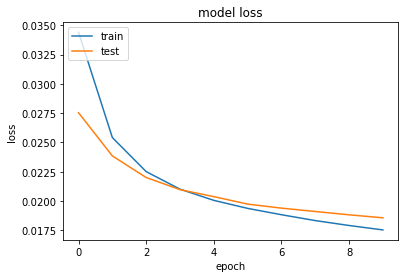

In [6]:
# PLotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss.png')
plt.show()

model.save('model.h5')

In [7]:
train_samples, validation_samples = train_test_split(lines, test_size=0.2)


In [8]:
print(train_samples)

[['/Users/Arash/GitHub/CarND-Behavioral-Cloning-P3/data/IMG/center_2018_07_19_21_39_39_237.jpg', '/Users/Arash/GitHub/CarND-Behavioral-Cloning-P3/data/IMG/left_2018_07_19_21_39_39_237.jpg', '/Users/Arash/GitHub/CarND-Behavioral-Cloning-P3/data/IMG/right_2018_07_19_21_39_39_237.jpg', '0', '1', '0', '30.1903'], ['/Users/Arash/GitHub/CarND-Behavioral-Cloning-P3/data/IMG/center_2018_07_19_21_39_55_251.jpg', '/Users/Arash/GitHub/CarND-Behavioral-Cloning-P3/data/IMG/left_2018_07_19_21_39_55_251.jpg', '/Users/Arash/GitHub/CarND-Behavioral-Cloning-P3/data/IMG/right_2018_07_19_21_39_55_251.jpg', '0', '1', '0', '30.1903'], ['/Users/Arash/GitHub/CarND-Behavioral-Cloning-P3/data/IMG/center_2018_07_19_21_39_30_027.jpg', '/Users/Arash/GitHub/CarND-Behavioral-Cloning-P3/data/IMG/left_2018_07_19_21_39_30_027.jpg', '/Users/Arash/GitHub/CarND-Behavioral-Cloning-P3/data/IMG/right_2018_07_19_21_39_30_027.jpg', '-0.6093929', '0.07900786', '0', '29.14394'], ['/Users/Arash/GitHub/CarND-Behavioral-Cloning-P3/